<a href="https://colab.research.google.com/github/sandhrabijoy/audio_translate/blob/master/NOVACpt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df=pd.read_excel('/content/drive/MyDrive/dataset3.xlsx')
df.head()

,MISMONTH,STATENAME,ZONE,DIVISION,BRANCH CODE,BRANCH NAME,LOAN_STATUS,PRODUCT,UNO LOAN NUMBER,NEW/USED,...,BOUNCECNT,PAYMENT FREQUENCY,DAYS REMAINED FROM LASTRIDATE,RECOVERY PAYMETHOD,CROSS SELL,FATYPE,RSC,REGION,REP_CHANNEL,EMPLOYPEE TYPE
0,20230831,BIHAR,BIHAR,BIHAR,CDPTN,PATNA,Running,TW,31075743,N,...,NaN,Monthly,21,Auto Clearing House,,TW,NaN,MAHARASHTRA,SHAHID,NonGovernment
1,20230831,BIHAR,BIHAR,BIHAR,BGSAR,BEGUSARAI,Running,TW,29030117,N,...,NaN,Monthly,21,Auto Clearing House,,TW,NaN,MAHARASHTRA,SHAHID,NonGovernment
2,20230831,BIHAR,BIHAR,BIHAR,BGAYA,GAYA,Running,TW,4733491,N,...,NaN,Monthly,21,Auto Clearing House,,TW,NaN,MAHARASHTRA,SHAHID,NonGovernment
3,20230831,BIHAR,BIHAR,BIHAR,MOTHA,MOTIHARI-BIHAR,Running,TW,16212160,N,...,NaN,Monthly,23,Auto Clearing House,,TW,NaN,MAHARASHTRA,SHAHID,NonGovernment
4,20230831,BIHAR,BIHAR,BIHAR,BHAPU,BHAGALPUR,Running,TW,1595005,N,...,17.0,Monthly,510,Auto Debit,,TW,NaN,MAHARASHTRA,SHAHID,NonGovernment


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 117 entries, MISMONTH to EMPLOYPEE TYPE
dtypes: datetime64[ns](8), float64(17), int64(60), object(32)
memory usage: 8.9+ MB


In [ ]:
df['LOAN_STATUS'].value_counts()

Running    10000
Name: LOAN_STATUS, dtype: int64

In [ ]:
df['PRODUCT'].value_counts()

TW    10000
Name: PRODUCT, dtype: int64

In [ ]:
df['MISMONTH'].value_counts()

20230831    10000
Name: MISMONTH, dtype: int64

In [ ]:
df=df.drop(['LOAN_STATUS','PRODUCT','MISMONTH'],axis=1)

In [ ]:
df['STATENAME'].value_counts()

BIHAR             8771
CHATTISHGARH       952
ANDHRA PRADESH     277
Name: STATENAME, dtype: int64

In [ ]:
df['NEW/USED'].value_counts()

N    10000
Name: NEW/USED, dtype: int64

In [ ]:
df_state_name=pd.get_dummies(df['STATENAME'])
df=pd.concat([df,df_state_name],axis=1)
df=df.drop(['STATENAME'],axis=1)


In [ ]:
df.head()

,ZONE,DIVISION,BRANCH CODE,BRANCH NAME,UNO LOAN NUMBER,NEW/USED,AGMT.YEAR,LOAN APPROVED MONTH,CAN/EXP/SET/SEIZED/SOLD MONTH,FIN.YEAR,...,RECOVERY PAYMETHOD,CROSS SELL,FATYPE,RSC,REGION,REP_CHANNEL,EMPLOYPEE TYPE,ANDHRA PRADESH,BIHAR,CHATTISHGARH
0,BIHAR,BIHAR,CDPTN,PATNA,31075743,N,202306,202306,NaN,2023-2024,...,Auto Clearing House,,TW,NaN,MAHARASHTRA,SHAHID,NonGovernment,0,1,0
1,BIHAR,BIHAR,BGSAR,BEGUSARAI,29030117,N,202304,202304,NaN,2023-2024,...,Auto Clearing House,,TW,NaN,MAHARASHTRA,SHAHID,NonGovernment,0,1,0
2,BIHAR,BIHAR,BGAYA,GAYA,4733491,N,202209,202209,NaN,2022-2023,...,Auto Clearing House,,TW,NaN,MAHARASHTRA,SHAHID,NonGovernment,0,1,0
3,BIHAR,BIHAR,MOTHA,MOTIHARI-BIHAR,16212160,N,202303,202303,NaN,2022-2023,...,Auto Clearing House,,TW,NaN,MAHARASHTRA,SHAHID,NonGovernment,0,1,0
4,BIHAR,BIHAR,BHAPU,BHAGALPUR,1595005,N,202111,202111,NaN,2021-2022,...,Auto Debit,,TW,NaN,MAHARASHTRA,SHAHID,NonGovernment,0,1,0


In [ ]:
df['CROSS SELL'].value_counts()

     10000
Name: CROSS SELL, dtype: int64

In [ ]:
df['REGION'].value_counts()

MAHARASHTRA       8771
WEST & KERALA      952
ANDHRA PRADESH     277
Name: REGION, dtype: int64

In [ ]:
df['FIN.YEAR'].value_counts()

2022-2023    5168
2021-2022    2551
2023-2024    2076
2020-2021     205
Name: FIN.YEAR, dtype: int64

In [ ]:
df['FIN.YEAR']=df['FIN.YEAR'].replace('2022-2023',1)
df['FIN.YEAR']=df['FIN.YEAR'].replace('2021-2022',2)
df['FIN.YEAR']=df['FIN.YEAR'].replace('2023-2024',3)
df['FIN.YEAR']=df['FIN.YEAR'].replace('2020-2021',4)

In [ ]:
df['REP_CHANNEL'].value_counts()

SHAHID          8771
JILANI           952
NARASA REDDY     277
Name: REP_CHANNEL, dtype: int64

In [ ]:
df['REP_CHANNEL']=df['REP_CHANNEL'].replace('SHAHID',1)
df['REP_CHANNEL']=df['REP_CHANNEL'].replace('JILANI',2)
df['REP_CHANNEL']=df['REP_CHANNEL'].replace('NARASA REDDY',3)

In [ ]:
df['RECOVERY PAYMETHOD'].value_counts()

Auto Clearing House    6410
Auto Debit             3585
PDC                       3
No PDC                    2
Name: RECOVERY PAYMETHOD, dtype: int64

In [ ]:
df['RECOVERY PAYMETHOD']=df['RECOVERY PAYMETHOD'].replace('Auto Clearing House',1)
df['RECOVERY PAYMETHOD']=df['RECOVERY PAYMETHOD'].replace('Auto Debit',2)
df['RECOVERY PAYMETHOD']=df['RECOVERY PAYMETHOD'].replace('PDC',3)
df['RECOVERY PAYMETHOD']=df['RECOVERY PAYMETHOD'].replace('No PDC',4)

In [ ]:
df['BUCKET STATUS'].value_counts()

Live Zero Arrear    8176
Hard Bucket         1004
Soft Bucket          820
Name: BUCKET STATUS, dtype: int64

In [ ]:
df['BUCKET STATUS']=df['BUCKET STATUS'].replace('Live Zero Arrear',1)
df['BUCKET STATUS']=df['BUCKET STATUS'].replace('Hard Bucket',2)
df['BUCKET STATUS']=df['BUCKET STATUS'].replace('Soft Bucket',3)

In [ ]:
df['FATYPE'].value_counts()

TW    10000
Name: FATYPE, dtype: int64

In [ ]:
df=df.drop(['NEW/USED','CAN/EXP/SET/SEIZED/SOLD MONTH','FATYPE','CROSS SELL'],axis=1)

In [ ]:
df['ANDHRA PRADESH'] = df['ANDHRA PRADESH'].replace(1, 2)
df['BIHAR'] = df['BIHAR'].replace(1, 3)
df['STATENAME']=df['ANDHRA PRADESH']+df['BIHAR']+df['CHATTISHGARH']

In [ ]:
df['EMPLOYPEE TYPE'].value_counts()

NonGovernment    9647
Government        353
Name: EMPLOYPEE TYPE, dtype: int64

In [ ]:
df_emptype=pd.get_dummies(df['EMPLOYPEE TYPE'])
df=pd.concat([df,df_emptype],axis=1)
df=df.drop(['EMPLOYPEE TYPE'],axis=1)
df['EMPLOYPEE TYPE']=df['NonGovernment']

In [ ]:
df['RSC'].value_counts()

Series([], Name: RSC, dtype: int64)

In [ ]:
df=df.drop(['RSC','ANDHRA PRADESH','BIHAR','CHATTISHGARH','Government'],axis=1)
df.head()

,ZONE,DIVISION,BRANCH CODE,BRANCH NAME,UNO LOAN NUMBER,AGMT.YEAR,LOAN APPROVED MONTH,FIN.YEAR,AG DATE,LOAN APPROVAL DATE,...,BUCKET STATUS,BOUNCECNT,PAYMENT FREQUENCY,DAYS REMAINED FROM LASTRIDATE,RECOVERY PAYMETHOD,REGION,REP_CHANNEL,STATENAME,NonGovernment,EMPLOYPEE TYPE
0,BIHAR,BIHAR,CDPTN,PATNA,31075743,202306,202306,3,2023-06-22,2023-06-22,...,1,NaN,Monthly,21,1,MAHARASHTRA,1,3,1,1
1,BIHAR,BIHAR,BGSAR,BEGUSARAI,29030117,202304,202304,3,2023-04-27,2023-04-28,...,1,NaN,Monthly,21,1,MAHARASHTRA,1,3,1,1
2,BIHAR,BIHAR,BGAYA,GAYA,4733491,202209,202209,1,2022-09-19,2022-09-19,...,1,NaN,Monthly,21,1,MAHARASHTRA,1,3,1,1
3,BIHAR,BIHAR,MOTHA,MOTIHARI-BIHAR,16212160,202303,202303,1,2023-03-16,2023-03-18,...,1,NaN,Monthly,23,1,MAHARASHTRA,1,3,1,1
4,BIHAR,BIHAR,BHAPU,BHAGALPUR,1595005,202111,202111,2,2021-11-28,2021-11-29,...,2,17.0,Monthly,510,2,MAHARASHTRA,1,3,1,1


In [ ]:
df['PAYMENT FREQUENCY'].value_counts()

Monthly    10000
Name: PAYMENT FREQUENCY, dtype: int64

In [ ]:
df['BOUNCECNT'].value_counts()

1.0     1166
2.0      616
3.0      343
4.0      265
5.0      212
6.0      203
7.0      177
8.0      160
9.0      136
10.0     105
12.0     101
11.0     100
13.0      88
14.0      76
17.0      61
16.0      60
15.0      54
18.0      49
19.0      41
20.0      38
21.0      29
23.0      21
22.0      20
24.0      16
29.0      12
27.0      10
25.0      10
26.0       7
28.0       5
30.0       4
32.0       2
31.0       2
Name: BOUNCECNT, dtype: int64

In [ ]:
cust_cat=pd.get_dummies(df['CUSTOMER CATEGORY'])
cust_cat['SALARIEDS']=cust_cat['SALARIED']
cust_cat['OTHERS']=cust_cat['AGRICULTURE-OTHERS']+cust_cat['FARMER']+cust_cat['HOUSEWIFE']+cust_cat['STUDENT']+cust_cat['MEMBER OF PUBLIC']
cust_cat['SELF-EMPLOYEDS']=cust_cat['SELF-EMPLOYED']+cust_cat['OWNER CUM DRIVER']
cust_cat=cust_cat.drop(['PENSIONER','SALARIED','AGRICULTURE-OTHERS','FARMER','HOUSEWIFE','STUDENT','MEMBER OF PUBLIC','OWNER CUM DRIVER','PROFESSION','SELF-EMPLOYED'],axis=1)
cust_cat

,PART TIME BUSINESS,SALARIEDS,OTHERS,SELF-EMPLOYEDS
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
9995,0,0,0,1
9996,0,0,0,1
9997,0,0,0,1
9998,0,0,0,1


In [ ]:
cust_cat['SELF-EMPLOYEDS']=cust_cat['PART TIME BUSINESS']+cust_cat['SELF-EMPLOYEDS']
cust_cat=cust_cat.drop(['PART TIME BUSINESS'],axis=1)

In [ ]:
cust_cat

,SALARIEDS,OTHERS,SELF-EMPLOYEDS
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
9995,0,0,1
9996,0,0,1
9997,0,0,1
9998,0,0,1


In [ ]:
df=pd.concat([df,cust_cat],axis=1)

In [ ]:
df['SELF-EMPLOYEDS'] = df['SELF-EMPLOYEDS'].replace(1, 2)
df['OTHERS'] = df['OTHERS'].replace(1, 3)
df['CUSTCAT']=df['SELF-EMPLOYEDS']+df['OTHERS']+df['SALARIEDS']

In [ ]:
df=df.drop(['SELF-EMPLOYEDS','OTHERS','SALARIEDS'],axis=1)

In [ ]:
df_gender=pd.get_dummies(df['GENDER'])
df_gender=df_gender.rename(columns={'F':'Female'})
df_gender=df_gender.rename(columns={'M':'Male'})
df_gender=df_gender.rename(columns={'U':'Unspecified'})
df_gender

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,0,1
9996,0,1
9997,0,1
9998,0,1


In [ ]:
df=pd.concat([df,df_gender],axis=1)

In [ ]:
df['GENDER']=df['Male']
df=df.drop(['Female','Male','CUSTOMER CATEGORY'],axis=1)

In [ ]:
df.head()

,ZONE,DIVISION,BRANCH CODE,BRANCH NAME,UNO LOAN NUMBER,AGMT.YEAR,LOAN APPROVED MONTH,FIN.YEAR,AG DATE,LOAN APPROVAL DATE,...,BOUNCECNT,PAYMENT FREQUENCY,DAYS REMAINED FROM LASTRIDATE,RECOVERY PAYMETHOD,REGION,REP_CHANNEL,STATENAME,NonGovernment,EMPLOYPEE TYPE,CUSTCAT
0,BIHAR,BIHAR,CDPTN,PATNA,31075743,202306,202306,3,2023-06-22,2023-06-22,...,NaN,Monthly,21,1,MAHARASHTRA,1,3,1,1,2
1,BIHAR,BIHAR,BGSAR,BEGUSARAI,29030117,202304,202304,3,2023-04-27,2023-04-28,...,NaN,Monthly,21,1,MAHARASHTRA,1,3,1,1,2
2,BIHAR,BIHAR,BGAYA,GAYA,4733491,202209,202209,1,2022-09-19,2022-09-19,...,NaN,Monthly,21,1,MAHARASHTRA,1,3,1,1,2
3,BIHAR,BIHAR,MOTHA,MOTIHARI-BIHAR,16212160,202303,202303,1,2023-03-16,2023-03-18,...,NaN,Monthly,23,1,MAHARASHTRA,1,3,1,1,2
4,BIHAR,BIHAR,BHAPU,BHAGALPUR,1595005,202111,202111,2,2021-11-28,2021-11-29,...,17.0,Monthly,510,2,MAHARASHTRA,1,3,1,1,1


In [ ]:
df['DATE OF BIRTH'].value_counts()

1995-01-01    218
1996-01-01    213
1990-01-01    198
1997-01-01    197
1994-01-01    181
             ... 
1977-10-02      1
2001-09-18      1
1984-03-23      1
1995-08-08      1
1984-03-06      1
Name: DATE OF BIRTH, Length: 3748, dtype: int64

In [ ]:
df['REGION'] = df['REGION'].replace('MAHARASHTRA', 1)


In [ ]:
df['REGION']=df['REGION'].replace('WEST & KERALA',2)
df['REGION']=df['REGION'].replace('ANDHRA PRADESH',3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 110 entries, ZONE to CUSTCAT
dtypes: datetime64[ns](8), float64(15), int64(64), object(18), uint8(5)
memory usage: 8.1+ MB


In [ ]:
df.columns

Index(['ZONE', 'DIVISION', 'BRANCH CODE', 'BRANCH NAME', 'UNO LOAN NUMBER',
       'AGMT.YEAR', 'LOAN APPROVED MONTH', 'FIN.YEAR', 'AG DATE',
       'LOAN APPROVAL DATE',
       ...
       'BOUNCECNT', 'PAYMENT FREQUENCY', 'DAYS REMAINED FROM LASTRIDATE',
       'RECOVERY PAYMETHOD', 'REGION', 'REP_CHANNEL', 'STATENAME',
       'NonGovernment', 'EMPLOYPEE TYPE', 'CUSTCAT'],
      dtype='object', length=110)

In [ ]:
df['ZONE'].value_counts()

BIHAR           8771
CHHATTISGARH     952
NELLORE          277
Name: ZONE, dtype: int64

In [ ]:
df['ZONE']=df['ZONE'].replace('BIHAR',1)
df['ZONE']=df['ZONE'].replace('CHHATTISGARH',2)
df['ZONE']=df['ZONE'].replace('NELLORE',3)

In [ ]:
df=df.drop(['NonGovernment','PAYMENT FREQUENCY'],axis=1)

In [ ]:
df['CANCELLED DATE'].value_counts()

Series([], Name: CANCELLED DATE, dtype: int64)

In [ ]:
df.isna().sum()

ZONE               0
DIVISION           0
BRANCH CODE        0
BRANCH NAME        0
UNO LOAN NUMBER    0
                  ..
REGION             0
REP_CHANNEL        0
STATENAME          0
EMPLOYPEE TYPE     0
CUSTCAT            0
Length: 108, dtype: int64

In [ ]:
df=df.drop(['COUNTRY'],axis=1)

In [ ]:
from google.colab import data_table

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 107 entries, ZONE to CUSTCAT
dtypes: datetime64[ns](8), float64(15), int64(65), object(15), uint8(4)
memory usage: 7.9+ MB


In [ ]:
df.head()

,ZONE,DIVISION,BRANCH CODE,BRANCH NAME,UNO LOAN NUMBER,AGMT.YEAR,LOAN APPROVED MONTH,FIN.YEAR,AG DATE,LOAN APPROVAL DATE,...,ANNUAL INCOME,BUCKET STATUS,BOUNCECNT,DAYS REMAINED FROM LASTRIDATE,RECOVERY PAYMETHOD,REGION,REP_CHANNEL,STATENAME,EMPLOYPEE TYPE,CUSTCAT
0,1,BIHAR,CDPTN,PATNA,31075743,202306,202306,3,2023-06-22,2023-06-22,...,200000,1,NaN,21,1,1,1,3,1,2
1,1,BIHAR,BGSAR,BEGUSARAI,29030117,202304,202304,3,2023-04-27,2023-04-28,...,140000,1,NaN,21,1,1,1,3,1,2
2,1,BIHAR,BGAYA,GAYA,4733491,202209,202209,1,2022-09-19,2022-09-19,...,240000,1,NaN,21,1,1,1,3,1,2
3,1,BIHAR,MOTHA,MOTIHARI-BIHAR,16212160,202303,202303,1,2023-03-16,2023-03-18,...,160000,1,NaN,23,1,1,1,3,1,2
4,1,BIHAR,BHAPU,BHAGALPUR,1595005,202111,202111,2,2021-11-28,2021-11-29,...,18000,2,17.0,510,2,1,1,3,1,1


In [ ]:
df['MARITAL STATUS'].value_counts()

M    7656
S    2344
Name: MARITAL STATUS, dtype: int64

In [ ]:
df_marstat=pd.get_dummies(df['MARITAL STATUS'])
df=pd.concat([df,df_marstat],axis=1)
df=df.drop(['MARITAL STATUS'],axis=1)

In [ ]:
df['MARITAL STATUS']=df['M']
df=df.drop(['M','S'],axis=1)

In [ ]:
!pip install scikit-learn
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor


In [ ]:
filtered_df = df[['TOTAL TBC', 'COLL AGAINST TBC', 'ARREARS', 'ARREARS MONTHS', 'BUCKET STATUS', 'DAYS REMAINED FROM LASTRIDATE',
                  'ZONE', 'FUT PRIN', 'PINCODE', 'STATENAME', 'CUSTCAT', 'REGION', 'RECOVERY PAYMETHOD', 'REP_CHANNEL',
                  'EMPLOYPEE TYPE', 'MARITAL STATUS', 'GENDER', 'ANNUAL INCOME', 'INVOICEVALUE', 'ADVANCE AMOUNT']]


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TOTAL TBC                      10000 non-null  int64  
 1   COLL AGAINST TBC               10000 non-null  int64  
 2   ARREARS                        10000 non-null  int64  
 3   ARREARS MONTHS                 10000 non-null  float64
 4   BUCKET STATUS                  10000 non-null  int64  
 5   DAYS REMAINED FROM LASTRIDATE  10000 non-null  int64  
 6   ZONE                           10000 non-null  int64  
 7   FUT PRIN                       10000 non-null  int64  
 8   PINCODE                        10000 non-null  int64  
 9   STATENAME                      10000 non-null  uint8  
 10  CUSTCAT                        10000 non-null  uint8  
 11  REGION                         10000 non-null  int64  
 12  RECOVERY PAYMETHOD             10000 non-null  

In [ ]:
filtered_df.isna().sum()

TOTAL TBC                        0
COLL AGAINST TBC                 0
ARREARS                          0
ARREARS MONTHS                   0
BUCKET STATUS                    0
DAYS REMAINED FROM LASTRIDATE    0
ZONE                             0
FUT PRIN                         0
PINCODE                          0
STATENAME                        0
CUSTCAT                          0
REGION                           0
RECOVERY PAYMETHOD               0
REP_CHANNEL                      0
EMPLOYPEE TYPE                   0
MARITAL STATUS                   0
GENDER                           0
ANNUAL INCOME                    0
INVOICEVALUE                     0
ADVANCE AMOUNT                   0
dtype: int64

In [ ]:
filtered_df.fillna(method='ffill')

,TOTAL TBC,COLL AGAINST TBC,ARREARS,ARREARS MONTHS,BUCKET STATUS,DAYS REMAINED FROM LASTRIDATE,ZONE,FUT PRIN,PINCODE,STATENAME,CUSTCAT,REGION,RECOVERY PAYMETHOD,REP_CHANNEL,EMPLOYPEE TYPE,MARITAL STATUS,GENDER,ANNUAL INCOME,INVOICEVALUE,ADVANCE AMOUNT
0,3856,3856,0,0.0,1,21,1,73756,801102,3,2,1,1,1,1,1,1,200000,95566,75858
1,10605,10605,0,0.0,1,21,1,76219,851112,3,2,1,1,1,1,0,1,140000,90237,82380
2,36344,36344,0,0.0,1,21,1,38170,824211,3,2,1,1,1,1,1,1,240000,86650,65000
3,21435,21435,0,0.0,1,23,1,28190,845435,3,2,1,1,1,1,1,1,160000,107108,46765
4,73600,11040,62560,17.0,2,510,1,14000,812006,3,1,1,2,1,1,0,1,18000,83490,69000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,68634,68634,0,0.0,1,44,1,21555,851101,3,2,1,1,1,1,1,1,260000,89671,75000
9996,30944,30944,0,0.0,1,23,1,51128,844113,3,2,1,1,1,1,1,1,200000,87380,78000
9997,37700,37700,0,0.0,1,23,1,24284,847301,3,2,1,1,1,1,1,1,144000,77855,60000
9998,51664,51664,0,0.0,1,23,1,23728,845425,3,2,1,2,1,1,1,1,20000,86000,62000


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TOTAL TBC                      10000 non-null  int64  
 1   COLL AGAINST TBC               10000 non-null  int64  
 2   ARREARS                        10000 non-null  int64  
 3   ARREARS MONTHS                 10000 non-null  float64
 4   BUCKET STATUS                  10000 non-null  int64  
 5   DAYS REMAINED FROM LASTRIDATE  10000 non-null  int64  
 6   ZONE                           10000 non-null  int64  
 7   FUT PRIN                       10000 non-null  int64  
 8   PINCODE                        10000 non-null  int64  
 9   STATENAME                      10000 non-null  uint8  
 10  CUSTCAT                        10000 non-null  uint8  
 11  REGION                         10000 non-null  int64  
 12  RECOVERY PAYMETHOD             10000 non-null  

In [ ]:
filtered_df.isnull().sum()

TOTAL TBC                        0
COLL AGAINST TBC                 0
ARREARS                          0
ARREARS MONTHS                   0
BUCKET STATUS                    0
DAYS REMAINED FROM LASTRIDATE    0
ZONE                             0
FUT PRIN                         0
PINCODE                          0
STATENAME                        0
CUSTCAT                          0
REGION                           0
RECOVERY PAYMETHOD               0
REP_CHANNEL                      0
EMPLOYPEE TYPE                   0
MARITAL STATUS                   0
GENDER                           0
ANNUAL INCOME                    0
INVOICEVALUE                     0
ADVANCE AMOUNT                   0
dtype: int64

In [ ]:
import pandas as pd
new_data_small = filtered_df.sample(n=100, random_state=42)
new_data_small = new_data_small.reset_index(drop=True)

print(new_data_small.head())


   TOTAL TBC  COLL AGAINST TBC  ARREARS  ARREARS MONTHS  BUCKET STATUS  \
0      17004             17004        0             0.0              1   
1          0                 0        0             0.0              1   
2      13020             13020        0             0.0              1   
3      23994             23994        0             0.0              1   
4      24600             24600        0             0.0              1   

   DAYS REMAINED FROM LASTRIDATE  ZONE  FUT PRIN  PINCODE  STATENAME  CUSTCAT  \
0                             23     1     71382   843332          3        2   
1                              0     2     80450   497118          1        2   
2                             23     1     44341   847212          3        2   
3                             23     1     59144   848209          3        2   
4                              7     2     63330   496338          1        2   

   REGION  RECOVERY PAYMETHOD  REP_CHANNEL  EMPLOYPEE TYPE  MARITAL 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import MultiTaskLasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

y = filtered_df[['TOTAL TBC', 'COLL AGAINST TBC', 'ARREARS', 'DAYS REMAINED FROM LASTRIDATE']]

X = filtered_df[['ZONE', 'FUT PRIN', 'PINCODE', 'STATENAME', 'CUSTCAT', 'REGION', 'RECOVERY PAYMETHOD', 'REP_CHANNEL',
        'EMPLOYPEE TYPE', 'MARITAL STATUS', 'GENDER', 'ANNUAL INCOME', 'INVOICEVALUE', 'ADVANCE AMOUNT']]

print("Shape of X and y before preprocessing:", X.shape, y.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




Shape of X and y before preprocessing: (10000, 14) (10000, 4)


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
r2_feature_importance = []
mse_feature_importance = []


model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
initial_r2 = r2_score(y, y_pred)
initial_mse = mean_squared_error(y, y_pred)

for feature_name in X.columns:

    X_feature_removed = X.drop(columns=[feature_name])


    model.fit(X_feature_removed, y)


    y_pred = model.predict(X_feature_removed)
    r2_after_feature_removal = r2_score(y, y_pred)
    mse_after_feature_removal = mean_squared_error(y, y_pred)


    r2_importance = initial_r2 - r2_after_feature_removal
    mse_importance = initial_mse - mse_after_feature_removal

    r2_feature_importance.append((feature_name, r2_importance))
    mse_feature_importance.append((feature_name, mse_importance))


print("Feature Importance Based on R-squared:")
for feature, r2_importance in sorted(r2_feature_importance, key=lambda x: x[1], reverse=True):
    print(f"{feature}: {r2_importance}")

print("\nFeature Importance Based on Mean Squared Error:")
for feature, mse_importance in sorted(mse_feature_importance, key=lambda x: x[1], reverse=True):
    print(f"{feature}: {mse_importance}")


Feature Importance Based on R-squared:
FUT PRIN: 0.45720965606641795
ADVANCE AMOUNT: 0.1250467336293249
INVOICEVALUE: 0.0020974151047206124
STATENAME: 0.0007201546017981952
GENDER: 0.0005414206501823116
MARITAL STATUS: 0.0001740781024845428
CUSTCAT: 0.00015340734163754588
PINCODE: 9.005450886712119e-05
RECOVERY PAYMETHOD: 7.086151505747429e-05
EMPLOYPEE TYPE: 3.820634808321399e-05
ANNUAL INCOME: 6.144478167435796e-06
ZONE: 6.106226635438361e-16
REGION: 6.106226635438361e-16
REP_CHANNEL: -2.220446049250313e-16

Feature Importance Based on Mean Squared Error:
ZONE: 1.341104507446289e-07
REP_CHANNEL: 6.705522537231445e-08
REGION: 5.960464477539063e-08
ANNUAL INCOME: -783.1853564381599
EMPLOYPEE TYPE: -3987.7082647904754
CUSTCAT: -7126.694866232574
MARITAL STATUS: -29751.727766223252
RECOVERY PAYMETHOD: -30855.143407076597
PINCODE: -40727.35434816778
GENDER: -57426.125126063824
STATENAME: -144773.9514758587
INVOICEVALUE: -245040.35522937775
ADVANCE AMOUNT: -64813941.15921805
FUT PRIN: -251

In [ ]:
lasso_model = MultiTaskLasso(alpha=1.0)
y_pred = cross_val_predict(lasso_model, X_scaled, y, cv=5, n_jobs=-1)

r2_scores = [r2_score(y[col], y_pred[:, idx]) for idx, col in enumerate(y.columns)]

for idx, col in enumerate(y.columns):
    print(f"R-squared for {col}: {r2_scores[idx]}")

In [ ]:

from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target variables
# X should be a 2D array or DataFrame, and y should be a 1D array or Series

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The 'test_size' parameter determines the proportion of the data to include in the test split.
# 'random_state' ensures reproducibility, setting it to a fixed value will give you the same split every time you run the code.


In [ ]:

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)


y_pred = lasso_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 45048256.52425241
R-squared (R2): 0.48400391810655197


In [ ]:
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [ ]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


In [ ]:
print(f"R-squared (Training): {r2_train:.2f}")
print(f"R-squared (Testing): {r2_test:.2f}")

R-squared (Training): -801810581.37
R-squared (Testing): -777558138.40


In [ ]:

threshold = 0.5
predicted_probabilities = lasso_model.predict(X_test)
predicted_classes = (predicted_probabilities > threshold).astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [ ]:
import xgboost as xgb

In [ ]:
xbg_reg = xgb.XGBRegressor().fit(X_train_scaled, y_train)
xbg_reg.feature_importances_

array([0.01773883, 0.5290202 , 0.02461472, 0.02483322, 0.0246742 ,
       0.        , 0.01753763, 0.        , 0.0141195 , 0.02240946,
       0.01264283, 0.01986763, 0.03109684, 0.2614449 ], dtype=float32)

In [ ]:
xbg_reg.get_booster().get_score(importance_type='gain')

{'f0': 86485992.0,
 'f1': 2579247360.0,
 'f2': 120009520.0,
 'f3': 121074824.0,
 'f4': 120299496.0,
 'f6': 85505040.0,
 'f8': 68839856.0,
 'f9': 109257720.0,
 'f10': 61640356.0,
 'f11': 96865000.0,
 'f12': 151613216.0,
 'f13': 1274679296.0}

In [ ]:
import pandas as pd
f_importance = xbg_reg.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame.from_dict(data=f_importance,
                                       orient='index')

In [ ]:
importance_df = pd.DataFrame({'Feature': f_importance.keys(), 'Importance': 0})

for feature, importance in f_importance.items():
    importance_df.loc[importance_df['Feature'] == feature, 'Importance'] = importance

importance_df = importance_df.sort_values(by='Importance', ascending=False)



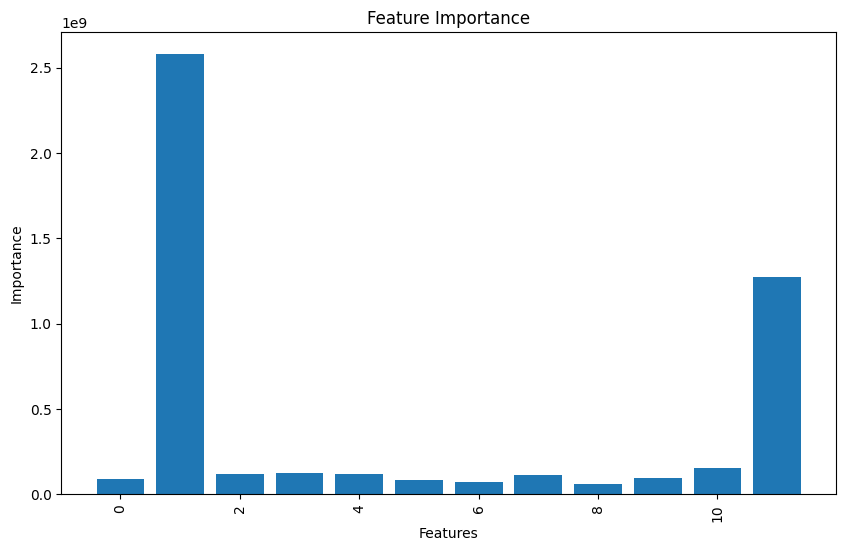

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(importance_df.index, importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()